# GEDI Waveform Processor Demo

This demo shows how to process GEDI Level 1B waveform data for use in machine learning workflows using the `gedi_waveform_processor` library.

## 1. Load GEDI GeoJSON

In [1]:
import os
import numpy as np
import geopandas as gpd
from pathlib import Path
from gedi_waveform_processor import GediWaveformProcessor



# get path to cwd and set project root
notebook_dir = Path.cwd()
project_root = notebook_dir.parent


# Load your GEDI subset GeoJSON here
gdf = gpd.read_file(os.path.join(project_root, "data\\sample_data_original.geojson"))
print(f"Loaded {len(gdf)} shots")


Loaded 43253 shots


## 2. Initialize Processor

In [2]:
# initialize the processor class
processor = GediWaveformProcessor(gdf)

In [3]:
# view the raw geodataframe
processor.gdf

,BEAM,shot_number_x,Latitude,Longitude,index,geolocation_degrade,geolocation_delta_time,geolocation_digital_elevation_model,geolocation_digital_elevation_model_srtm,geolocation_elevation_bin0,...,land_ice,inland_water,noise_mean_corrected,rx_sample_count,rxwaveform,shot_number_y,stale_return_flag,tx_sample_count,txwaveform,geometry
0,BEAM0101,23260500200072586,33.681579,107.741609,0,30,4.282502e+07,1612.6921,1622.9742,9464.126237,...,0,0,206.0625,605,"207.8357,207.59224,206.75879,205.62312,204.692...",23260500200072586,1,128,"205.27112,204.74843,204.28874,204.18782,204.61...",POINT (107.74161 33.68158)
1,BEAM0101,23260500200072587,33.681938,107.742052,1,30,4.282502e+07,1612.6921,1633.9747,9464.141268,...,0,0,206.1250,605,"207.04167,207.01224,206.81403,206.56955,206.29...",23260500200072587,1,128,"206.18788,205.44164,204.92384,205.10107,205.96...",POINT (107.74205 33.68194)
2,BEAM0101,23260500200072588,33.682296,107.742496,2,30,4.282502e+07,1687.2897,1663.9760,9464.708799,...,0,0,206.8750,605,"204.97151,204.54935,204.30559,203.97227,203.33...",23260500200072588,1,128,"206.05783,206.0252,206.08655,206.16615,206.262...",POINT (107.7425 33.6823)
3,BEAM0101,23260500200072589,33.682654,107.742939,3,30,4.282502e+07,1722.5920,1720.9769,9464.788021,...,0,0,205.5000,605,"206.60533,206.69649,206.83812,207.03865,207.10...",23260500200072589,1,128,"207.98897,208.62949,208.63083,207.96938,206.94...",POINT (107.74294 33.68265)
4,BEAM0101,23260500200072590,33.683013,107.743383,4,30,4.282502e+07,1783.8431,1756.9775,9464.842876,...,0,0,205.4375,605,"206.84935,206.61653,205.93959,204.92636,203.84...",23260500200072590,1,128,"206.25534,206.76038,207.0016,206.93732,206.775...",POINT (107.74338 33.68301)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43248,BEAM1011,225121100300396638,33.830025,107.743086,73,0,1.553054e+08,1818.4966,1819.6344,1512.116131,...,0,0,223.5625,701,"224.7704,224.55869,223.87271,223.00513,222.356...",225121100300396638,1,128,"224.09714,224.23293,224.03804,223.41835,222.53...",POINT (107.74309 33.83003)
43249,BEAM1011,225121100300396639,33.829667,107.743531,74,0,1.553054e+08,1818.4966,1823.6365,1512.415923,...,0,0,222.3750,701,"222.08311,221.57515,220.91641,220.30237,219.97...",225121100300396639,1,128,"222.80908,222.8213,222.63322,222.30229,221.923...",POINT (107.74353 33.82967)
43250,BEAM1011,225121100300396640,33.829310,107.743975,75,0,1.553054e+08,1804.3976,1817.6381,1512.095885,...,0,0,222.8750,701,"221.40668,220.23363,219.59398,219.88893,220.94...",225121100300396640,1,128,"222.77327,223.09386,223.5687,223.99889,224.169...",POINT (107.74398 33.82931)
43251,BEAM1011,225121100300396641,33.828952,107.744420,76,0,1.553054e+08,1804.3976,1781.6411,1512.826214,...,0,0,223.2500,701,"219.66551,218.60013,218.43385,219.17413,220.31...",225121100300396641,1,128,"223.60835,224.15572,224.69193,225.02585,225.05...",POINT (107.74442 33.82895)


## 3. Filter Shots by Quality Flags and Elevation

In [4]:
filtered = processor.filter_shots(max_elevation_diff=200)
filtered

,BEAM,shot_number_x,Latitude,Longitude,index,geolocation_degrade,geolocation_delta_time,geolocation_digital_elevation_model,geolocation_digital_elevation_model_srtm,geolocation_elevation_bin0,...,land_ice,inland_water,noise_mean_corrected,rx_sample_count,rxwaveform,shot_number_y,stale_return_flag,tx_sample_count,txwaveform,geometry
398,BEAM0101,26210500300373479,33.747044,107.560844,0,0,4.446746e+07,2143.1614,2131.5166,2192.352745,...,0,0,205.1250,740,"203.55956,202.98267,202.70265,202.81763,203.33...",26210500300373479,0,128,"203.53235,202.36287,201.33565,200.75517,200.62...",POINT (107.56084 33.74704)
399,BEAM0101,26210500300373480,33.746696,107.561272,1,0,4.446746e+07,2178.5676,2171.5178,2239.495132,...,0,0,204.8125,983,"204.50717,203.88394,203.1297,202.62317,202.625...",26210500300373480,0,128,"202.85083,202.22029,202.14107,202.73271,203.75...",POINT (107.56127 33.7467)
400,BEAM0101,26210500300373481,33.746348,107.561700,2,0,4.446746e+07,2178.5676,2195.5186,2285.556381,...,0,0,204.6875,803,"204.20847,204.16566,204.52599,205.25452,205.96...",26210500300373481,0,128,"207.15926,207.34532,207.19312,206.89465,206.55...",POINT (107.5617 33.74635)
401,BEAM0101,26210500300373482,33.745996,107.562134,3,0,4.446746e+07,2187.9270,2235.5200,2313.214639,...,0,0,204.5000,789,"207.47687,207.46866,206.57042,205.12569,203.64...",26210500300373482,0,128,"206.64708,206.83879,206.7011,206.65683,207.080...",POINT (107.56213 33.746)
404,BEAM0101,26210500300373485,33.744924,107.563464,6,0,4.446746e+07,2267.3174,2261.5232,2313.632944,...,0,0,205.0625,799,"204.92876,205.12674,205.34102,205.25084,204.56...",26210500300373485,0,128,"205.0166,205.06018,204.88936,204.389,203.7365,...",POINT (107.56346 33.74492)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42870,BEAM1000,220390800300397361,33.688209,107.644044,186,0,1.526705e+08,2412.3032,2412.7305,2461.026461,...,0,0,254.6875,777,"256.96228,257.13992,256.22,254.5427,252.97011,...",220390800300397361,0,128,"255.30927,255.74591,255.81168,255.28499,254.19...",POINT (107.64404 33.68821)
42871,BEAM1000,220390800300397362,33.687849,107.644489,187,0,1.526705e+08,2406.9277,2424.7312,2477.102723,...,0,0,254.6875,716,"255.14694,255.15303,255.00943,254.66737,254.11...",220390800300397362,0,128,"254.95772,255.24657,255.56967,255.76874,255.78...",POINT (107.64449 33.68785)
42878,BEAM1000,220390800300397369,33.685365,107.647559,194,0,1.526705e+08,2352.2800,2353.7397,2375.979985,...,0,0,254.6875,768,"251.94301,251.1448,250.63002,250.27936,249.848...",220390800300397369,0,128,"255.5674,255.42928,254.67789,253.53163,252.592...",POINT (107.64756 33.68536)
42880,BEAM1000,220390800300397371,33.684658,107.648432,196,0,1.526705e+08,2302.7922,2300.7419,2326.478171,...,0,0,254.9375,730,"256.58234,256.3351,255.74768,255.24425,255.095...",220390800300397371,0,128,"253.37155,253.14557,253.18513,253.54791,254.23...",POINT (107.64843 33.68466)


## 4. Plot Random GEDI Waveforms

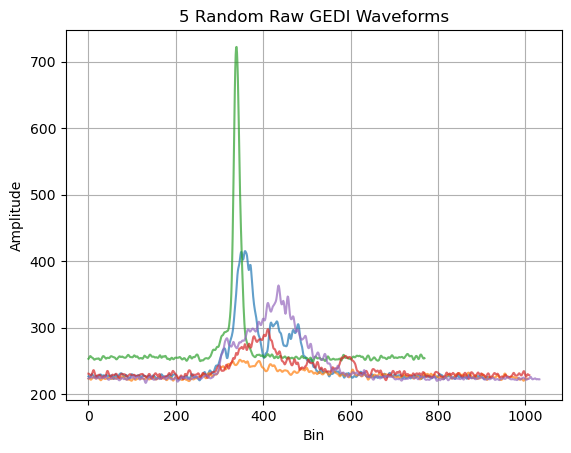

In [5]:
processor.plot_random_waveforms(n=5)

## 5. Process All Waveforms for ML Input

In [6]:
processor.process_all_waveforms(target_length=500, resample_method= 'fft', norm_method='zscore')

Done. Skipped 134 invalid or malformed waveforms.


,BEAM,shot_number_x,Latitude,Longitude,index,geolocation_degrade,geolocation_delta_time,geolocation_digital_elevation_model,geolocation_digital_elevation_model_srtm,geolocation_elevation_bin0,...,inland_water,noise_mean_corrected,rx_sample_count,rxwaveform,shot_number_y,stale_return_flag,tx_sample_count,txwaveform,geometry,rxwaveform_pro
398,BEAM0101,26210500300373479,33.747044,107.560844,0,0,4.446746e+07,2143.1614,2131.5166,2192.352745,...,0,205.1250,740,"203.55956,202.98267,202.70265,202.81763,203.33...",26210500300373479,0,128,"203.53235,202.36287,201.33565,200.75517,200.62...",POINT (107.56084 33.74704),"[-0.9218281813843839, -1.1113573210858003, -1...."
399,BEAM0101,26210500300373480,33.746696,107.561272,1,0,4.446746e+07,2178.5676,2171.5178,2239.495132,...,0,204.8125,983,"204.50717,203.88394,203.1297,202.62317,202.625...",26210500300373480,0,128,"202.85083,202.22029,202.14107,202.73271,203.75...",POINT (107.56127 33.7467),"[-0.5168544524704489, -0.910776655988615, -1.0..."
400,BEAM0101,26210500300373481,33.746348,107.561700,2,0,4.446746e+07,2178.5676,2195.5186,2285.556381,...,0,204.6875,803,"204.20847,204.16566,204.52599,205.25452,205.96...",26210500300373481,0,128,"207.15926,207.34532,207.19312,206.89465,206.55...",POINT (107.5617 33.74635),"[-0.4764343570952085, -0.5456489894035899, -0...."
401,BEAM0101,26210500300373482,33.745996,107.562134,3,0,4.446746e+07,2187.9270,2235.5200,2313.214639,...,0,204.5000,789,"207.47687,207.46866,206.57042,205.12569,203.64...",26210500300373482,0,128,"206.64708,206.83879,206.7011,206.65683,207.080...",POINT (107.56213 33.746),"[-0.1181980306327183, -0.07683672455469044, -0..."
404,BEAM0101,26210500300373485,33.744924,107.563464,6,0,4.446746e+07,2267.3174,2261.5232,2313.632944,...,0,205.0625,799,"204.92876,205.12674,205.34102,205.25084,204.56...",26210500300373485,0,128,"205.0166,205.06018,204.88936,204.389,203.7365,...",POINT (107.56346 33.74492),"[-0.6098111343070189, -0.5747041202133765, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42870,BEAM1000,220390800300397361,33.688209,107.644044,186,0,1.526705e+08,2412.3032,2412.7305,2461.026461,...,0,254.6875,777,"256.96228,257.13992,256.22,254.5427,252.97011,...",220390800300397361,0,128,"255.30927,255.74591,255.81168,255.28499,254.19...",POINT (107.64404 33.68821),"[-0.07392621073038826, -0.07964572432435325, -..."
42871,BEAM1000,220390800300397362,33.687849,107.644489,187,0,1.526705e+08,2406.9277,2424.7312,2477.102723,...,0,254.6875,716,"255.14694,255.15303,255.00943,254.66737,254.11...",220390800300397362,0,128,"254.95772,255.24657,255.56967,255.76874,255.78...",POINT (107.64449 33.68785),"[-0.13665101682140965, -0.10822572086011853, -..."
42878,BEAM1000,220390800300397369,33.685365,107.647559,194,0,1.526705e+08,2352.2800,2353.7397,2375.979985,...,0,254.6875,768,"251.94301,251.1448,250.63002,250.27936,249.848...",220390800300397369,0,128,"255.5674,255.42928,254.67789,253.53163,252.592...",POINT (107.64756 33.68536),"[-1.0186771313516785, -1.4874691431242975, -1...."
42880,BEAM1000,220390800300397371,33.684658,107.648432,196,0,1.526705e+08,2302.7922,2300.7419,2326.478171,...,0,254.9375,730,"256.58234,256.3351,255.74768,255.24425,255.095...",220390800300397371,0,128,"253.37155,253.14557,253.18513,253.54791,254.23...",POINT (107.64843 33.68466),"[0.0611718709142516, 0.007069894691570497, -0...."


## 6. Visualize Processed Waveforms

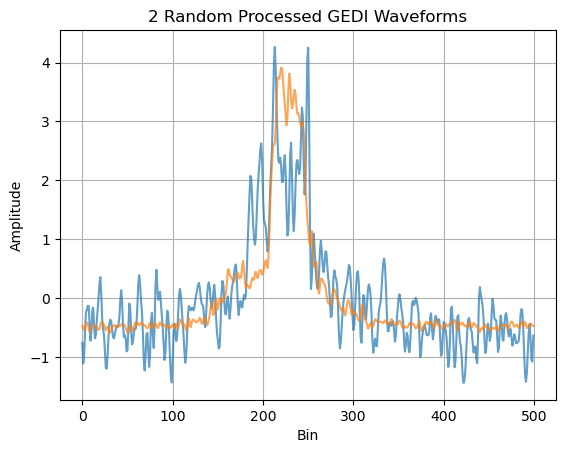

In [7]:
processor.plot_random_waveforms(n = 2)

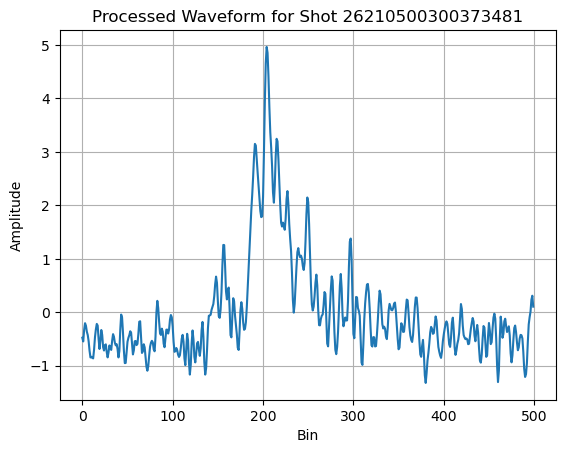

In [8]:
processor.plot_waveform(shot_number_x = 26210500300373481)

## 7. Export to HDF5 / TensorFlow / PyTorch

In [9]:
# Export all in one go
out_path = os.path.join(project_root, 'data/gedi_waveforms_tf.npz')
processor.export_ml_ready_dataset(out_path, format="npz")
# processor.export_ml_ready_dataset(out_path, format="pt")

✅ Saved TensorFlow-ready dataset to c:\Users\Zachary\Downloads\gedi_waveform_processor_library\data/gedi_waveforms_tf.npz
